<a href="https://colab.research.google.com/github/sonjoy1s/ML/blob/main/Module11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [98]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    confusion_matrix,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_curve,
    auc,
)

# Make plots a bit larger by default
plt.rcParams['figure.figsize'] = (7, 5)

###simple decision Tree

In [99]:
data = {
    'Weather': ['Sunny', 'Rainy', 'Sunny', 'Sunny', 'Rainy', 'Rainy', 'Sunny', 'Rainy'],
    'Windy':   [0,        1,       0,        1,        0,        1,        0,       1],
    'Play':    [1,        0,       1,        1,        0,        0,        1,       0]
}
df = pd.DataFrame(data)
df

,Weather,Windy,Play
0,Sunny,0,1
1,Rainy,1,0
2,Sunny,0,1
3,Sunny,1,1
4,Rainy,0,0
5,Rainy,1,0
6,Sunny,0,1
7,Rainy,1,0


In [100]:
#Encode categorical feature and prepare X, y
df['Weather_num'] = df['Weather'].map({'Sunny': 1, 'Rainy': 0})
X_syn = df[['Weather_num', 'Windy']]
y_syn = df['Play']
print(X_syn)
print(y_syn)

   Weather_num  Windy
0            1      0
1            0      1
2            1      0
3            1      1
4            0      0
5            0      1
6            1      0
7            0      1
0    1
1    0
2    1
3    1
4    0
5    0
6    1
7    0
Name: Play, dtype: int64


In [101]:
tree_syn = DecisionTreeClassifier(max_depth=3,random_state=42)
tree_syn.fit(X_syn,y_syn)
tree_syn

DecisionTreeClassifier(max_depth=3, random_state=42)

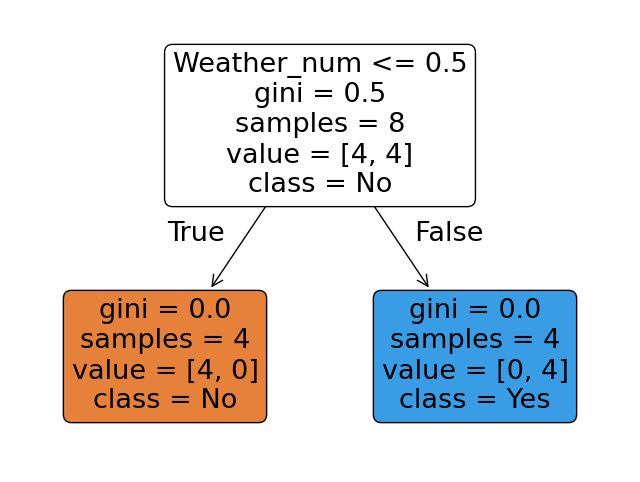

In [102]:
#Visualize the tree
plt.figure(figsize=(8,6))
plot_tree(tree_syn,
          feature_names=['Weather_num','Windy'],
          class_names=['No','Yes'],
          filled =True,
          rounded =True
          )
plt.show()

In [103]:
from pandas.core.api import DataFrame
# Example: Sunny (1), not windy (0)
exm1 = pd.DataFrame([[1,0]],columns=['Weather_num','Windy'])
pred1 = tree_syn.predict(exm1)[0]
print(pred1)

# Rainy 0 and windy 1
exm2 = pd.DataFrame([[0,1]],columns=['Weather_num','Windy'])
pred2 = tree_syn.predict(exm2)[0]
print(pred2)

1
0


In [104]:
#Create a slightly larger synthetic dataset
from sklearn.datasets import make_classification

X_big, y_big = make_classification(
    n_samples=400,#Total data points
    n_features=5,#Total feature number
    n_informative=3,#Total relevant features
    n_redundant=0,#No strong correlation among the features
    n_classes=2,#Target variable/feature class number
    random_state=42,#Every time we will get the similar random dataset
)
X_train_big, X_test_big, y_train_big, y_test_big = train_test_split(
    X_big, y_big, test_size=0.3, random_state=42
)

X_train_big.shape, X_test_big.shape

((280, 5), (120, 5))

In [105]:
deep_tree = DecisionTreeClassifier(random_state=42)
deep_tree.fit(X_train_big,y_train_big)


deep_pruned = DecisionTreeClassifier(max_depth=3,random_state=42)
deep_pruned.fit(X_train_big,y_train_big)

y_train_big_deep = deep_tree.predict(X_train_big)
y_test_big_deep = deep_tree.predict(X_test_big)

y_train_big_pruned = deep_pruned.predict(X_train_big)
y_test_big_pruned = deep_pruned.predict(X_test_big)

print('Deep tree – train accuracy:', round(accuracy_score(y_train_big, y_train_big_deep), 3))
print('Deep tree – test accuracy :', round(accuracy_score(y_test_big, y_test_big_deep), 3))
print()
print('Pruned tree – train accuracy:', round(accuracy_score(y_train_big, y_train_big_pruned), 3))
print('Pruned tree – test accuracy :', round(accuracy_score(y_test_big, y_test_big_pruned), 3))

Deep tree – train accuracy: 1.0
Deep tree – test accuracy : 0.883

Pruned tree – train accuracy: 0.904
Pruned tree – test accuracy : 0.892


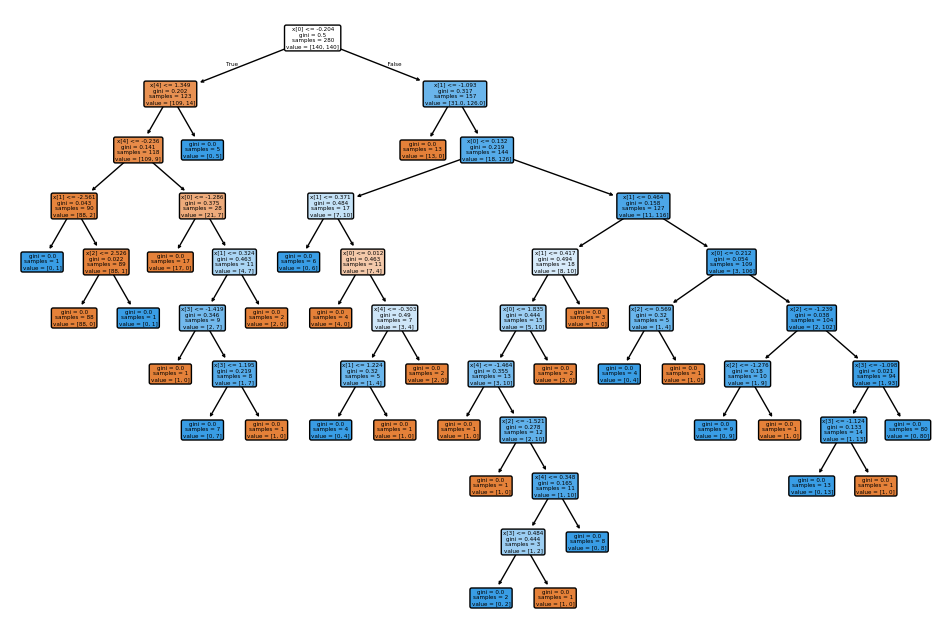

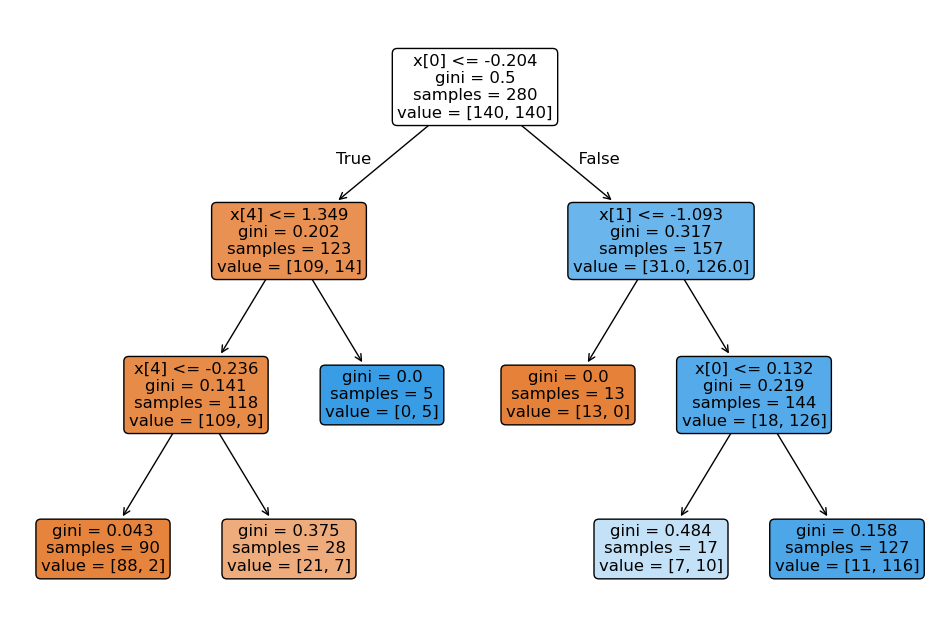

In [106]:
# Plot deep tree (showing only top levels for readability)
plt.figure(figsize=(12,8))
plot_tree(
    deep_tree,
    filled=True,
    rounded=True
)
plt.show()


plt.figure(figsize=(12,8))
plot_tree(
    deep_pruned,
    filled=True,
    rounded=True
)
plt.show()

In [107]:
np.random.seed(42)
n_samples = 300

age = np.random.randint(30, 80, size=n_samples)
chol = np.random.randint(150, 300, size=n_samples)
thalach = np.random.randint(90, 200, size=n_samples)

# We create a simple rule-based probability for disease just for realism
risk_score = 0.03 * (age - 40) + 0.02 * (chol - 200) - 0.02 * (thalach - 140)
prob = 1 / (1 + np.exp(-0.05 * risk_score))

target = (prob > np.median(prob)).astype(int)

df_heart = pd.DataFrame({
    'age': age,
    'chol': chol,
    'thalach': thalach,
    'target': target
})

df_heart.head(10)

,age,chol,thalach,target
0,68,253,128,1
1,58,233,90,1
2,44,261,92,1
3,72,248,166,1
4,37,242,181,0
5,50,295,151,1
6,68,277,152,1
7,48,259,114,1
8,52,231,145,0
9,40,203,122,0


In [108]:
X_heart = df_heart[['age', 'chol', 'thalach']]
y_heart = df_heart['target']

X_train_h, X_test_h, y_train_h, y_test_h = train_test_split(
    X_heart, y_heart, test_size=0.3, random_state=42)

tree_heart = DecisionTreeClassifier(max_depth=4, random_state=42)
tree_heart.fit(X_train_h, y_train_h)

DecisionTreeClassifier(max_depth=4, random_state=42)

In [109]:
#Confusion Matrix Plot
y_pred_h = tree_heart.predict(X_test_h)
cm = confusion_matrix(y_test_h, y_pred_h)
cm

array([[40,  1],
       [ 7, 42]])

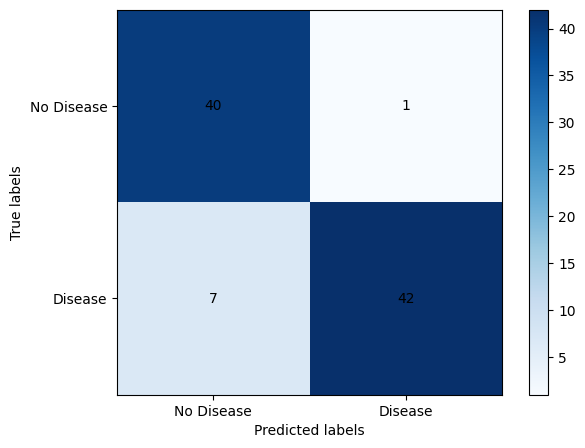

In [110]:
#Plot
fig, ax = plt.subplots()
im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_xticks([0, 1])
ax.set_yticks([0, 1])

ax.set_xticklabels(['No Disease', 'Disease'])
ax.set_yticklabels(['No Disease', 'Disease'])


for i in range(cm.shape[0]):
  for j in range(cm.shape[1]):
    ax.text(j, i, format(cm[i, j], 'd'),
            ha="center", va="center")
           # color="white" if cm[i, j] > cm.max() / 2. else "black")
plt.colorbar(im)
plt.show()

In [112]:
# (accuracy, precision,recall,f1):
acc = accuracy_score(y_test_h, y_pred_h)
prec = precision_score(y_test_h, y_pred_h)
rec = recall_score(y_test_h, y_pred_h)
f1 = f1_score(y_test_h,y_pred_h)

print('Accuracy :', round(acc, 3))
print('Precision:', round(prec, 3))
print('Recall   :', round(rec, 3))
print('F1 score :', round(f1, 3))

Accuracy : 0.911
Precision: 0.977
Recall   : 0.857
F1 score : 0.913


###Roc Curve and AUC

In [113]:
# predicted Probabilities
y_pred_prob_h = tree_heart.predict_proba(X_test_h)[:, 1]
y_pred_prob_h[:10]

array([1.        , 0.        , 0.05263158, 0.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 0.36363636])

In [115]:
#Roc Currve and AUC
fpr, tpr, thresholds = roc_curve(y_test_h, y_pred_prob_h)
roc_auc = auc(fpr, tpr)
print('AUC:', round(roc_auc, 3))

AUC: 0.952


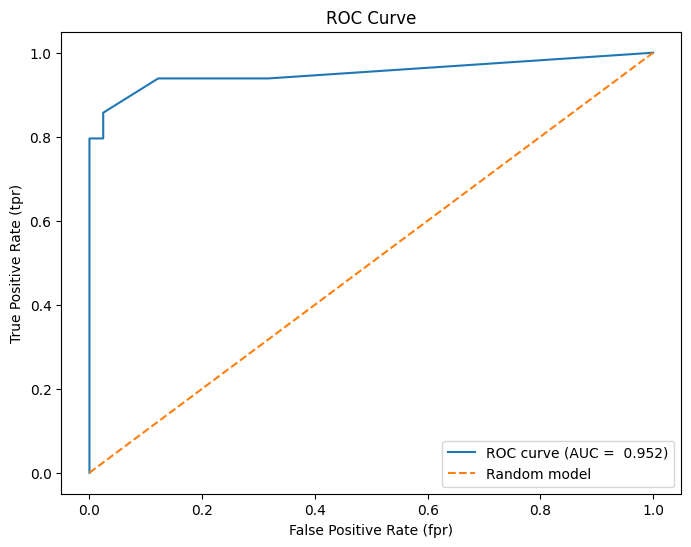

In [116]:
#Plot
plt.figure(figsize=(8, 6))
plt.plot(fpr,tpr, label=f'ROC curve (AUC = {roc_auc: .3f})')
plt.plot([0,1], [0,1], linestyle='--', label='Random model')
plt.xlabel('False Positive Rate (fpr)')
plt.ylabel('True Positive Rate (tpr)')
plt.title("ROC Curve")
plt.legend()
plt.show()